Copyright (c) 2017, Johannes Schöneberg. All rights reserved.
The default copyright laws apply.

![title](figures/fig_tube3_findTubeVector_logo.png)

In [9]:
#http://soft-matter.github.io/trackpy/v0.3.2/tutorial/walkthrough.html


from __future__ import division, unicode_literals, print_function  # for compatibility with Python 2 and 3

import matplotlib as mpl
import matplotlib.pyplot as plt

# change the following to %matplotlib notebook for interactive plotting
%matplotlib inline

# Optionally, tweak styles.
#mpl.rc('figure',  figsize=(10, 6))
#mpl.rc('image', cmap='gray')

import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience

import pims


In [10]:
def get_max_and_envelope_indexes(chnl1_histo):
    
    chnl1_max = np.max(chnl1_histo)
    
    #print(np.where(chnl1_histo == chnl1_max))
    # get the index from the maximum
    maxIndex = np.where(chnl1_histo == chnl1_max)[0][0]
#    meanIntensity = np.sum(chnl1_histo)

    roundingPrecision = 1
    
    # get the index of the rightmost index left to the maximum
    #print(np.where(np.round(chnl1_histo[0:maxIndex]/chnl1_max,1) == 0.5))
    leftOfMax = np.where(np.round(chnl1_histo[0:maxIndex]/chnl1_max,roundingPrecision) <= 0.5)
    if(len(leftOfMax[0]))!=0:
        leftOfMaxIndex = leftOfMax[0][-1]
    else:
        leftOfMaxIndex = -1
    #print(leftOfMaxIndex)
    
    # get the index of the leftmost index right to the maximum
    #print(np.where(np.round(chnl1_histo[maxIndex:-1]/chnl1_max,1) == 0.5))
    rightOfMax = np.where(np.round(chnl1_histo[maxIndex:-1]/chnl1_max,roundingPrecision) <= 0.5)
    if(len(rightOfMax[0]))!=0:
        rightOfMaxIndex = maxIndex + rightOfMax[0][0]
    else:
        rightOfMaxIndex = -1
    #print(rightOfMaxIndex)
    
    return([leftOfMaxIndex,maxIndex,rightOfMaxIndex,rightOfMaxIndex-leftOfMaxIndex])

In [11]:
# what does this function do again exactly?
def getTubeEnvelope(frame):
    #print("<getTubeEnvelopeFrame>")
    #plt.imshow(frame,cmap='gray')
    #print("</getTubeEnvelopeFrame>")
    #plt.show()
    output = np.zeros((len(frame),4))
    
    for i in range(0,len(frame)):
        
        # do a window average
        w=1
        if(i-w>0 and i+w<len(frame)):
            xlimits = (i-w,i+w)
        else:
            xlimits = (i,i)
        ylimits = (0,250)
        tubedata = frame[xlimits[0]:xlimits[1],ylimits[0]:ylimits[1]]
        line = np.sum(tubedata,axis=0)
    
        #print("<getTubeEnvelopeFrame plotLine>")
        #plt.plot(line)
        #plt.show()
        #print("<getTubeEnvelopeFrame plotLine>")
        #
        l,mx,r,leng = get_max_and_envelope_indexes(line)
        output[i][0] = l
        output[i][1] = mx
        output[i][2] = r
        output[i][3] = leng
        
    #    if(l<0):
    #        plt.show()
    #        plt.plot(line)
        
    return output

In [12]:
def printTubeEnvelope(envelope):
    print("<printTubeEnvelope>")
    plt.figure(figsize=(6, 6), dpi=80)
    plt.plot(envelope[:,0])
    plt.plot(envelope[:,1])
    plt.plot(envelope[:,2])
    plt.show()
    print("</printTubeEnvelope>")

In [13]:
# arguemnts:
# guessed tube midpoint
# guessed window in which the tube is nice and clean

def compute_tube_attachment_point_on_vesicle_y(tresholdedFrame, tubeMidPoint_y,tubeWindow_y,threshold = 1.33):
    # get the fwhm of the tube

    guessedTubeMidpoint = tubeMidPoint_y
    xlimits = (0,len(tresholdedFrame))
    w = 1
    ylimits = (int(tubeMidPoint_y)-w,int(tubeMidPoint_y)+w)
    tubedata = tresholdedFrame[xlimits[0]:xlimits[1],ylimits[0]:ylimits[1]]
    plt.plot(np.sum(tubedata,axis=1))
    
    
    
    # go from the tube midpoint to the right and take the point where it is not zero
    attachmentPoint_y = guessedTubeMidpoint + np.min(np.where(np.sum(tubedata,axis=1)[guessedTubeMidpoint:-1]==0))
    plt.axvline(x=attachmentPoint_y,c='k')
    plt.show()
    return attachmentPoint_y





# get the high point next to the bead






    

In [14]:
#parameters
# guessed midpoint of the tube in y
# transmitted detector frame
def compute_tube_attachment_point_on_bead_y(td_image,tubeMidPoint_y, tubeMidpoint_x):
    guessedTubeMidpoint = tubeMidPoint_y
    ylimits = (0,tubeMidPoint_y)
    w = 1
    xlimits = (int(tubeMidpoint_x)-w,int(tubeMidpoint_x)+w)
    tubedata = td_image[ylimits[0]:ylimits[1],xlimits[0]:xlimits[1]]
    plt.plot(np.sum(tubedata,axis=1))
    
    
    
    # go from the max intensity which is the bead
    beadMax = np.argmax(np.sum(tubedata,axis=1))
    #now search for the minimum right of that
    beadMin_right = beadMax+ np.argmin(np.sum(tubedata,axis=1)[beadMax:-1])
    
    # go from that position to the tube midpoint and geht the hump
    beadHump_right = beadMin_right+ np.argmax(np.sum(tubedata,axis=1)[beadMin_right:-1])
    
    # take the middle between miminum and hump
    attachmentY = int((beadMin_right+beadHump_right)/2)
    
    
    plt.axvline(x=attachmentY,c='k')
    plt.show()
    return(attachmentY)




In [15]:
def get_tube_midpoint_x(tubeEnvelope,tubeMidPoint_y, tubeWindow_y):
    maxima=tubeEnvelope[:,1]
    bottomIndex = tubeMidPoint_y-tubeWindow_y
    maximaBottom = maxima[bottomIndex]
    topIndex =tubeMidPoint_y+tubeWindow_y
    maximaTop = maxima[topIndex]
    meanmax = int((maximaBottom+maximaTop)/2)
    return(meanmax)

In [16]:
def get_tube_x(tubeEnvelope,y):
    return int((tubeEnvelope[:,0][y]+tubeEnvelope[:,2][y])/2)
    # this kills me
#    return tubeEnvelope[:,1][y]

In [17]:
def get_tube_lenght(beadPoint,vesiclePoint):
    return np.linalg.norm(np.array(beadAttachmentVector)-np.array(vesicleAttachmentVector))

In [36]:
# arguemnts:
# guessed tube midpoint
# guessed window in which the tube is nice and clean

def compute_tube_attachment_point_on_bead_y_threshold(tresholdedFrame, tubeMidPoint_y,tubeWindow_y,threshold = 1.33):
    # get the fwhm of the tube

    guessedTubeMidpoint = tubeMidPoint_y
    xlimits = (0,len(tresholdedFrame))
    w = 1
    ylimits = (int(tubeMidPoint_y)-w,int(tubeMidPoint_y)+w)
    tubedata = tresholdedFrame[xlimits[0]:xlimits[1],ylimits[0]:ylimits[1]]
    plt.plot(np.sum(tubedata,axis=1))
    
    
    
    # go from the tube midpoint to the left and take the point where it is not zero
    print(np.where(np.sum(tubedata,axis=1)[0:guessedTubeMidpoint]==0))
    attachmentPoint_y = np.max(np.where(np.sum(tubedata,axis=1)[0:guessedTubeMidpoint]==0))
    plt.axvline(x=attachmentPoint_y,c='k')
    plt.show()
    return attachmentPoint_y

![title](figures/fig_tube3_preprocessImages_roi_trick.png)

![title](figures/fig_tube3_preprocessImages.png)

In [21]:
#membrane channel
frames = pims.TiffStack_pil('/Users/johannesschoeneberg/Desktop/PostDoc/hurley_lab/pulling_confleezers_dataSharing_local/2018-06-05_movie1/movie_ch0_avg20_zoomVesicle.tif') 
#transmitted detector
framesg = pims.TiffStack_pil('/Users/johannesschoeneberg/Desktop/PostDoc/hurley_lab/pulling_confleezers_dataSharing_local/2018-06-05_movie1/movie_ch3_avg20_zoomVesicle.tif')
#debleached, maxentropy tresholded
framest = pims.TiffStack_pil('/Users/johannesschoeneberg/Desktop/PostDoc/hurley_lab/pulling_confleezers_dataSharing_local/2018-06-05_movie1/movie_ch0_avg20_zoomVesicle_debleach_mxEnt.tif') 

tubeMidPoint_y = 82
tubeWindow_y = 3 #lenght in px up and down from the midpoint where the tube is ok



############### 904
<printTubeEnvelope>


/Users/johannesschoeneberg/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide
/Users/johannesschoeneberg/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in less_equal


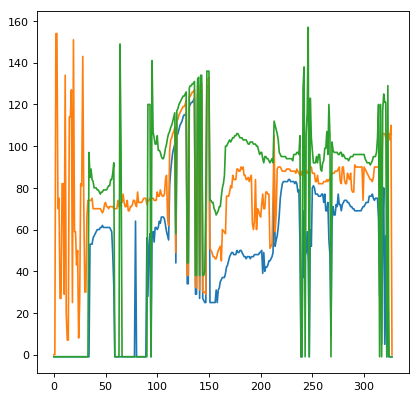

</printTubeEnvelope>
tubeMidpoint_x: 75


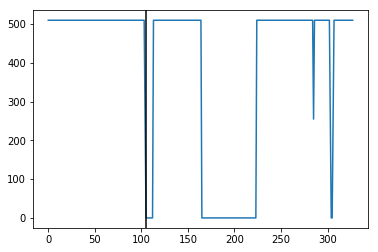

tubeAttachmentPoint_vesicle_y: 105


NameError: name 'framestb' is not defined

In [37]:
frameId = 904
beadAdditionalMargin = 5
analysisResult = []
i = frameId
print("############### "+str(i))
tubeEnvelope = getTubeEnvelope(frames[i])
printTubeEnvelope(tubeEnvelope)
tubeMidpoint_x = get_tube_midpoint_x(tubeEnvelope,tubeMidPoint_y,tubeWindow_y)
print("tubeMidpoint_x:",tubeMidpoint_x)
tubeAttachmentPoint_vesicle_y = compute_tube_attachment_point_on_vesicle_y(framest[i], tubeMidPoint_y,tubeWindow_y)
print("tubeAttachmentPoint_vesicle_y:",tubeAttachmentPoint_vesicle_y)
tubeAttachmentPoint_bead_y = beadAdditionalMargin + compute_tube_attachment_point_on_bead_y_threshold(framestb[i],tubeMidPoint_y, tubeMidpoint_x)
print("tubeAttachmentPoint_bead_y:",tubeAttachmentPoint_bead_y)

beadAttachmentVector = [tubeAttachmentPoint_bead_y,get_tube_x(tubeEnvelope,tubeAttachmentPoint_vesicle_y)]
print(beadAttachmentVector)
vesicleAttachmentVector = [tubeAttachmentPoint_vesicle_y,get_tube_x(tubeEnvelope,tubeAttachmentPoint_vesicle_y)]
print(vesicleAttachmentVector)

tubeLenght = get_tube_lenght(beadAttachmentVector,vesicleAttachmentVector)
print("tube length [px]:",tubeLenght)

fig = plt.figure(figsize=(3, 3), dpi=80)
plt.imshow(framesg[i],cmap='gray')
#plot([x1, x2], [y1, y2], color='k', linestyle='-', linewidth=2)
plt.plot([beadAttachmentVector[1], vesicleAttachmentVector[1]],
         [beadAttachmentVector[0], vesicleAttachmentVector[0]], 'r-', lw=2)
plt.title("frame "+str(i))
plt.show()

fig.savefig("tube__calculate_tube_vector/frame_"+str(i)+"_membrane.png")

fig = plt.figure(figsize=(3, 3), dpi=80)
plt.imshow(frames[i],cmap='gray')
#plot([x1, x2], [y1, y2], color='k', linestyle='-', linewidth=2)
plt.plot([beadAttachmentVector[1], vesicleAttachmentVector[1]],
         [beadAttachmentVector[0], vesicleAttachmentVector[0]], 'r-', lw=2)
plt.title("frame "+str(i))
plt.show()
fig.savefig("tube__calculate_tube_vector/frame_"+str(i)+"_TD.png")

analysisResult.append([tubeLenght,vesicleAttachmentVector[0],vesicleAttachmentVector[1],beadAttachmentVector[0],beadAttachmentVector[1]])



############### 900


/Users/johannesschoeneberg/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide
/Users/johannesschoeneberg/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in less_equal


76


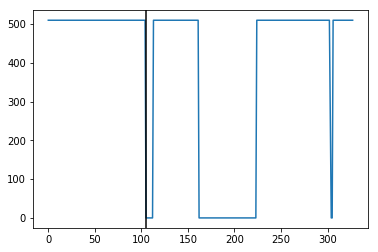

105


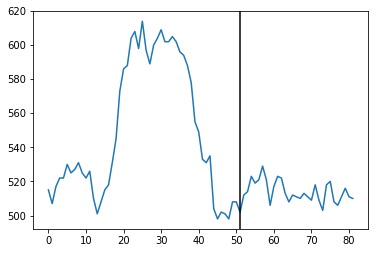

51
[51, 70]
[105, 80]
tube length [px]: 54.918120871


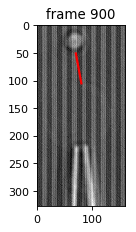

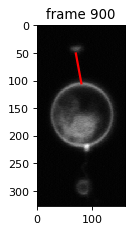

############### 901
75


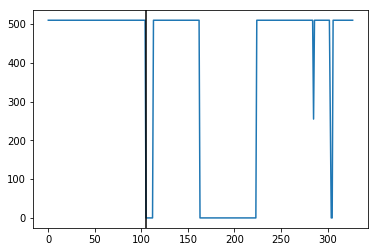

105


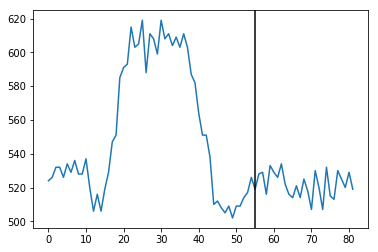

55
[55, 70]
[105, 80]
tube length [px]: 50.9901951359


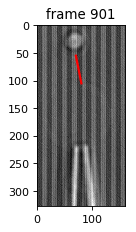

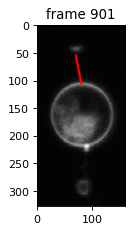

############### 902
75


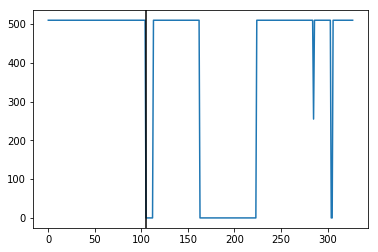

105


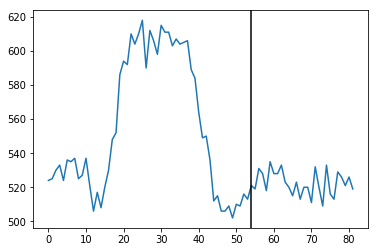

54
[54, 70]
[105, 80]
tube length [px]: 51.9711458407


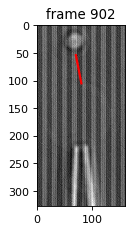

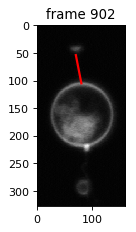

############### 903
75


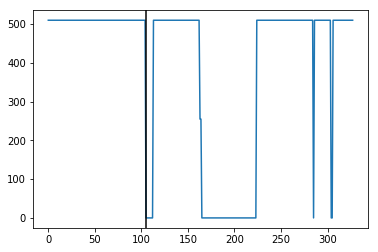

105


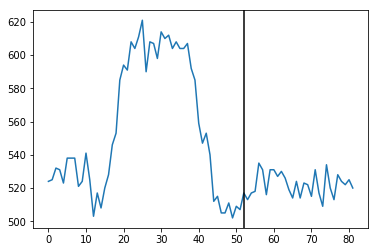

52
[52, 70]
[105, 79]
tube length [px]: 53.7587202229


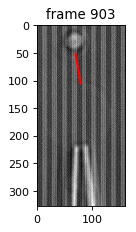

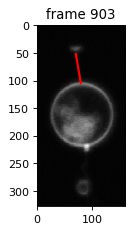

############### 904
75


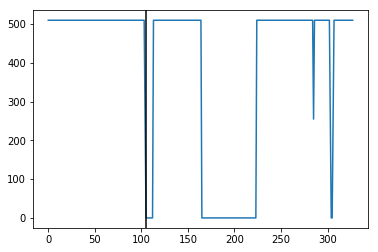

105


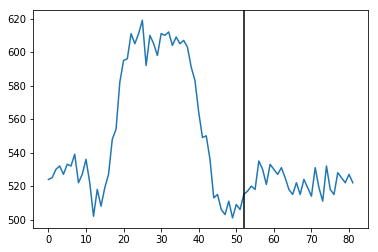

52
[52, 70]
[105, 80]
tube length [px]: 53.9351462406


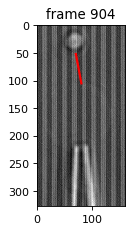

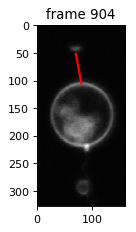

############### 905
75


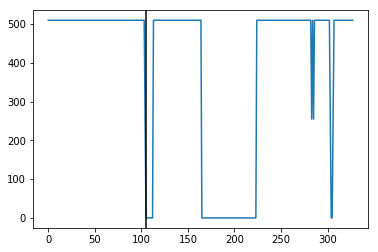

105


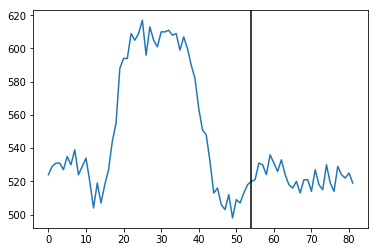

54
[54, 71]
[105, 79]
tube length [px]: 51.6236379966


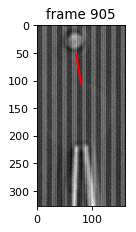

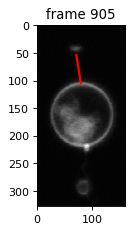

############### 906
72


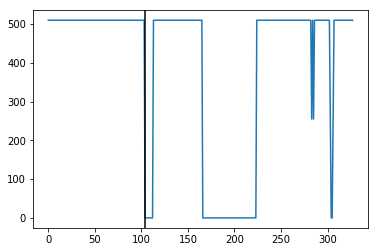

104


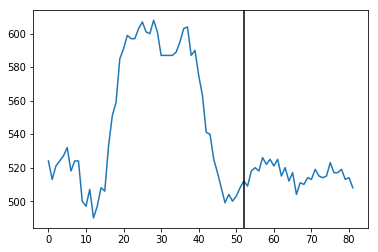

52
[52, 69]
[104, 80]
tube length [px]: 53.1507290637


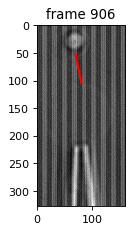

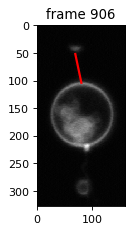

############### 907
72


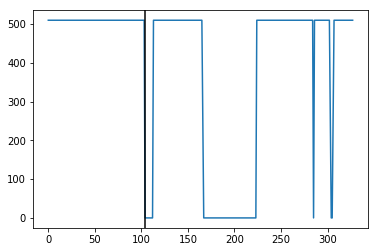

104


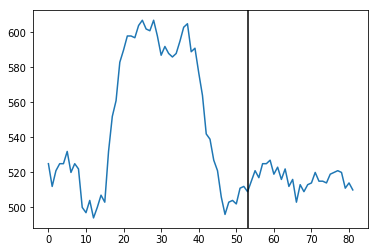

53
[53, 70]
[104, 80]
tube length [px]: 51.9711458407


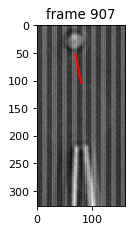

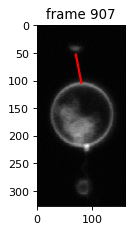

############### 908
72


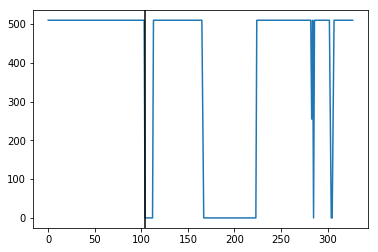

104


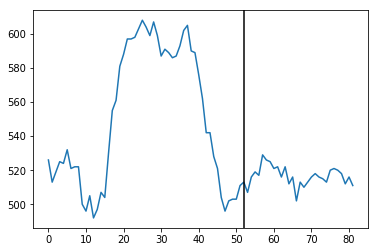

52
[52, 70]
[104, 80]
tube length [px]: 52.9528091795


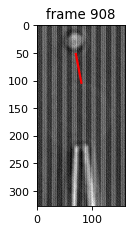

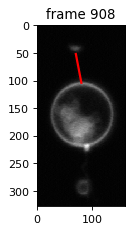

############### 909
72


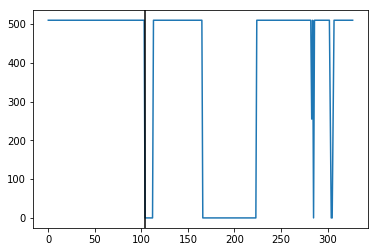

104


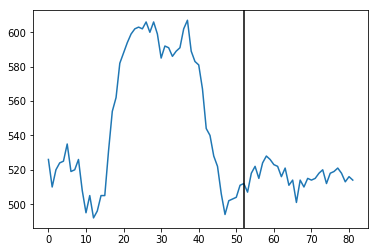

52
[52, 69]
[104, 80]
tube length [px]: 53.1507290637


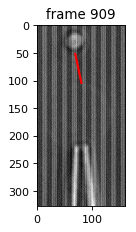

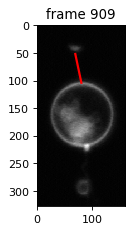

############### 910
72


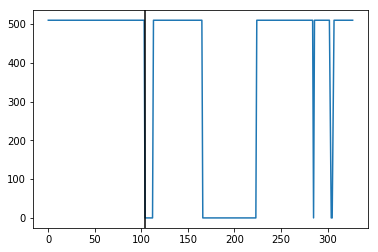

104


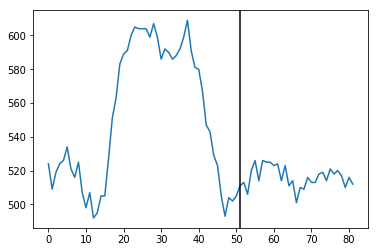

51
[51, 69]
[104, 79]
tube length [px]: 53.9351462406


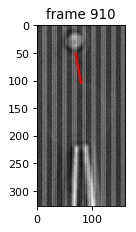

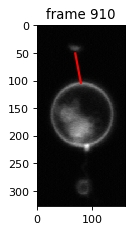

############### 911
76


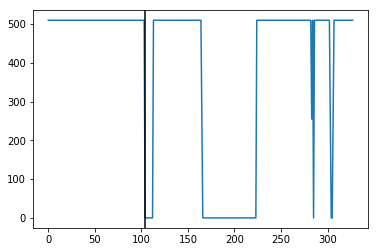

104


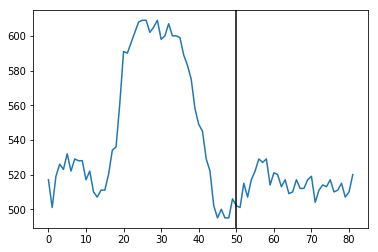

50
[50, 70]
[104, 80]
tube length [px]: 54.918120871


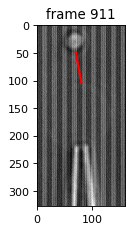

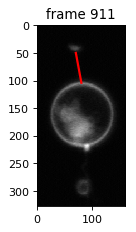

############### 912
76


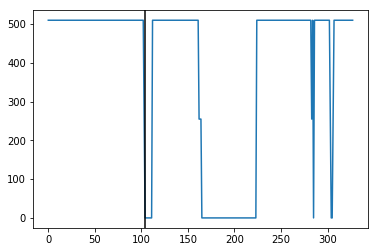

104


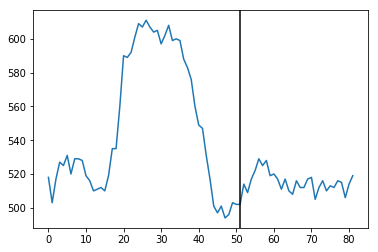

51
[51, 69]
[104, 80]
tube length [px]: 54.1294744109


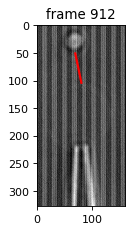

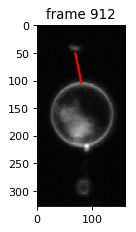

############### 913
76


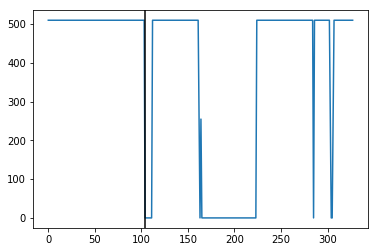

104


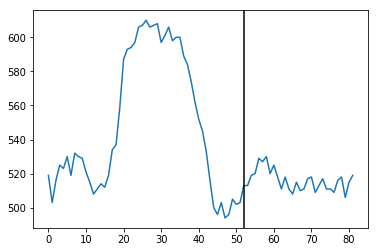

52
[52, 68]
[104, 80]
tube length [px]: 53.3666562565


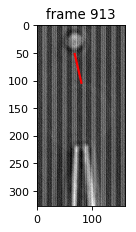

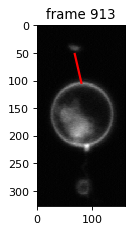

############### 914
73


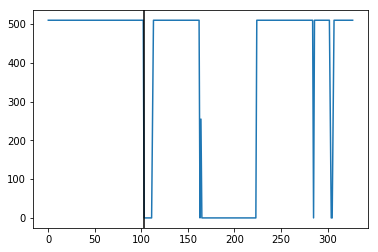

103


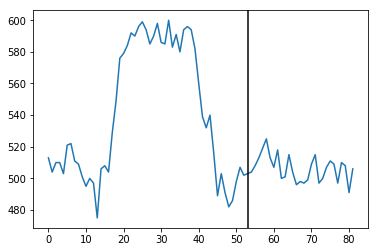

53
[53, 69]
[103, 80]
tube length [px]: 51.1957029447


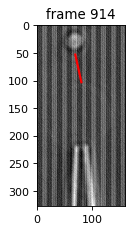

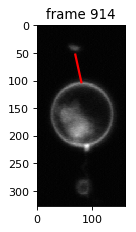

############### 915
73


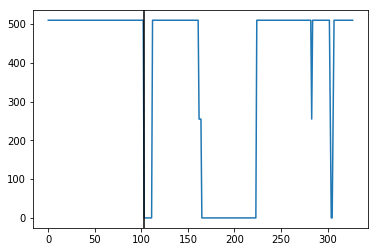

103


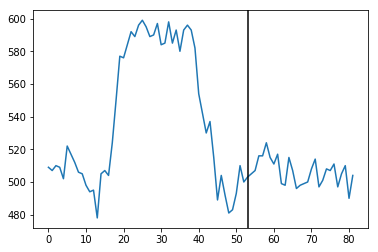

53
[53, 69]
[103, 80]
tube length [px]: 51.1957029447


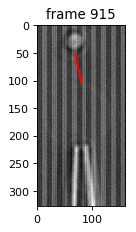

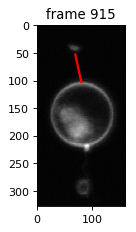

############### 916
73


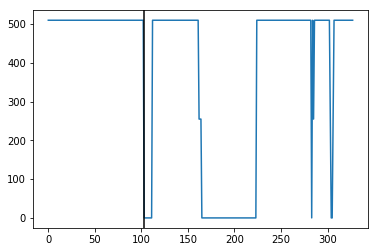

103


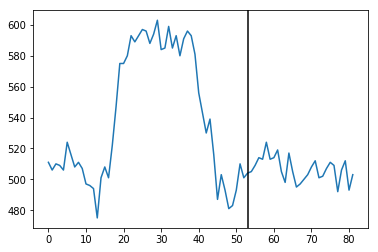

53
[53, 72]
[103, 81]
tube length [px]: 50.8035431835


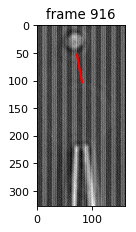

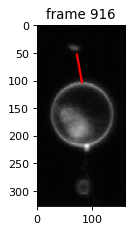

############### 917
73


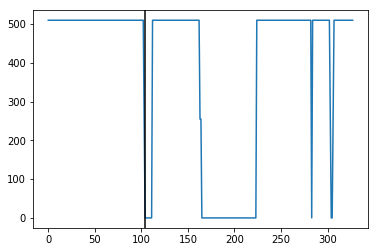

104


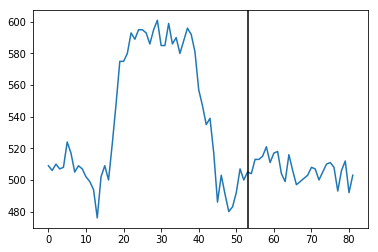

53
[53, 71]
[104, 80]
tube length [px]: 51.7880295049


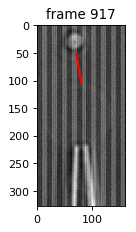

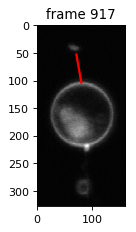

############### 918
75


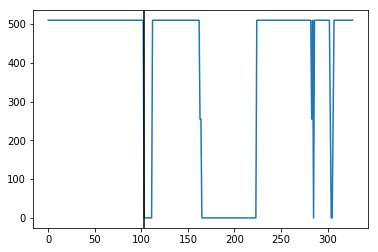

103


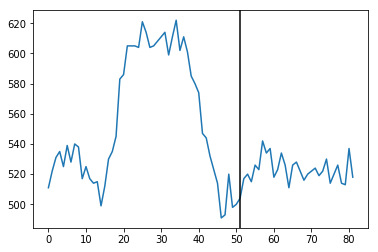

51
[51, 68]
[103, 81]
tube length [px]: 53.600373133


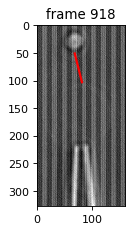

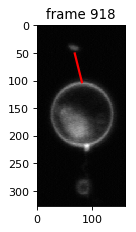

############### 919
75


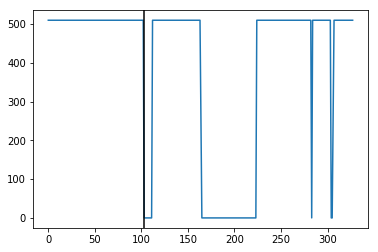

103


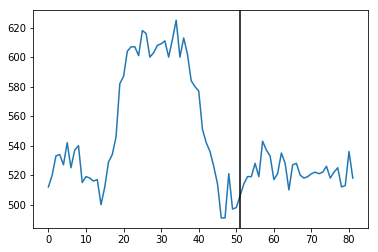

51
[51, 68]
[103, 81]
tube length [px]: 53.600373133


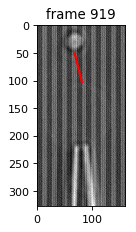

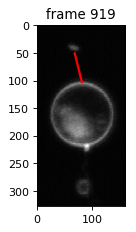

############### 920
75


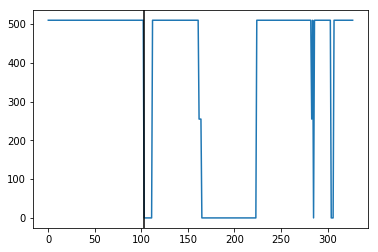

103


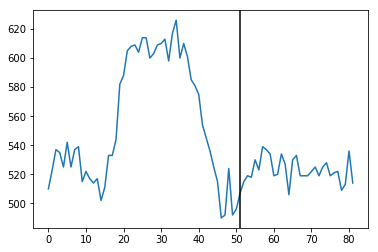

51
[51, 68]
[103, 81]
tube length [px]: 53.600373133


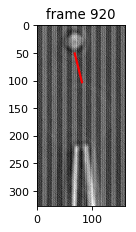

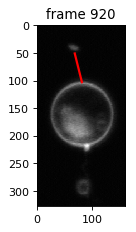

############### 921
75


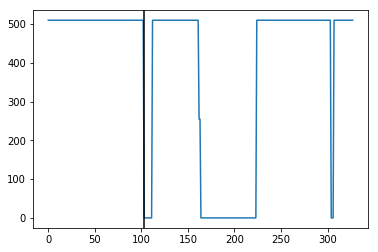

103


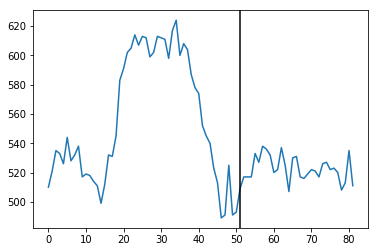

51
[51, 68]
[103, 81]
tube length [px]: 53.600373133


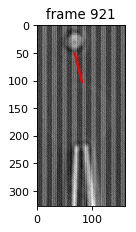

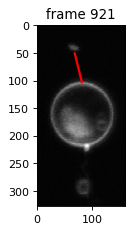

############### 922
74


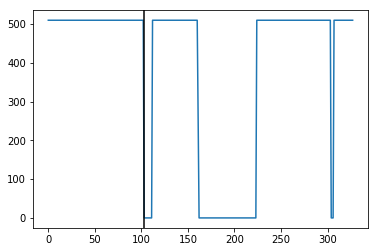

103


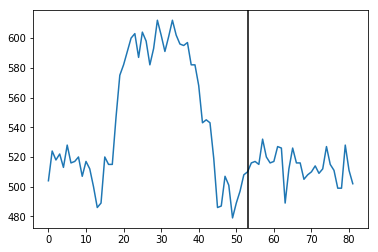

53
[53, 86]
[103, 81]
tube length [px]: 50.2493781056


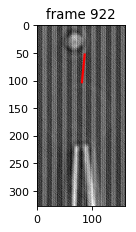

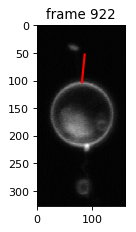

############### 923
77


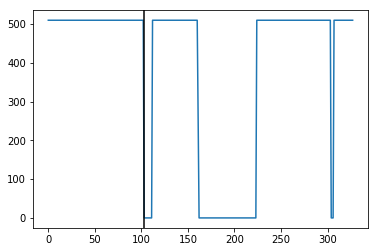

103


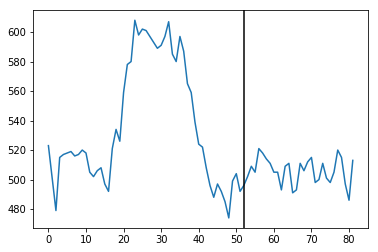

52
[52, 68]
[103, 81]
tube length [px]: 52.6307894678


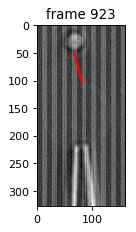

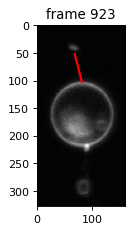

############### 924
77


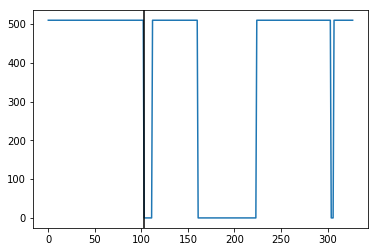

103


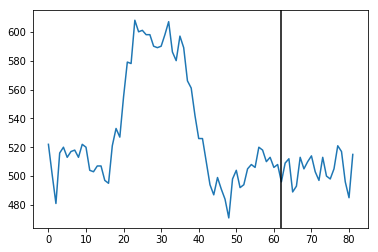

62
[62, -1]
[103, 81]
tube length [px]: 91.6787870775


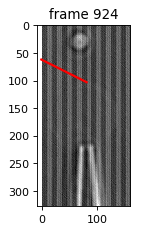

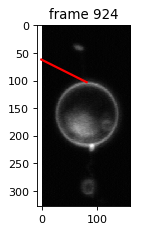

############### 925
75


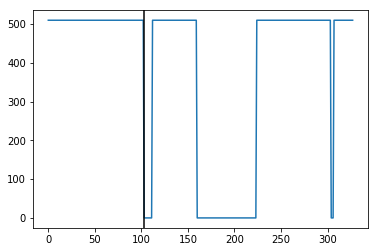

103


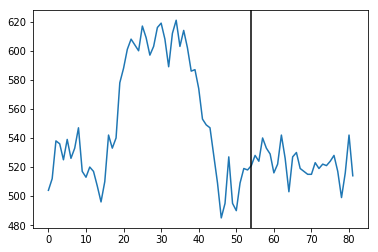

54
[54, -1]
[103, 81]
tube length [px]: 95.5248658727


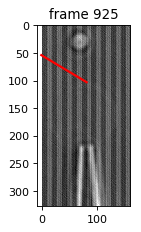

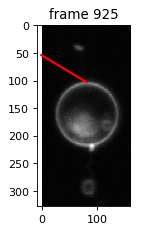

############### 926
75


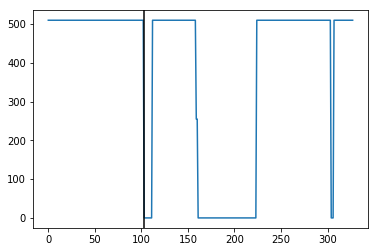

103


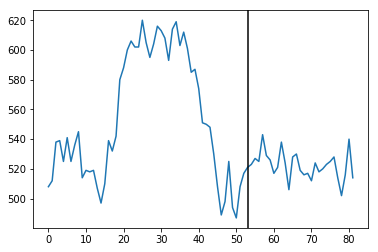

53
[53, 6]
[103, 81]
tube length [px]: 90.1387818866


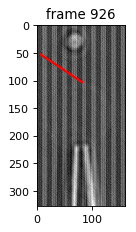

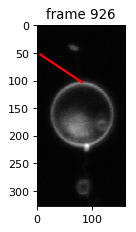

############### 927
75


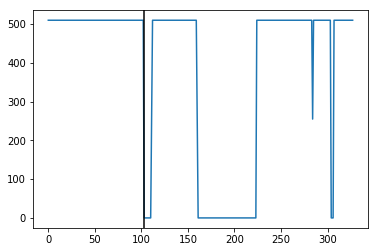

103


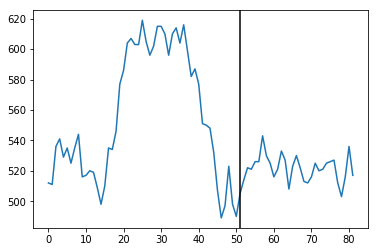

51
[51, 68]
[103, 82]
tube length [px]: 53.8516480713


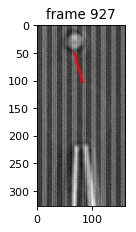

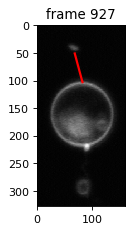

############### 928
75


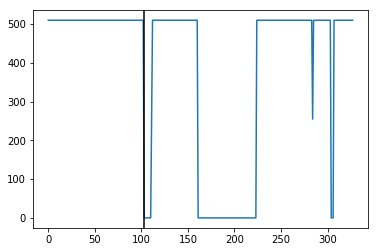

103


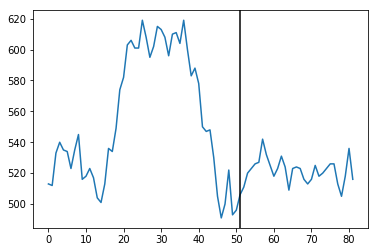

51
[51, 68]
[103, 81]
tube length [px]: 53.600373133


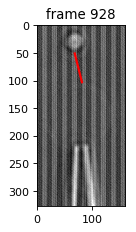

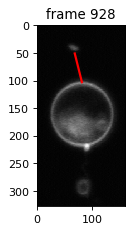

############### 929
77


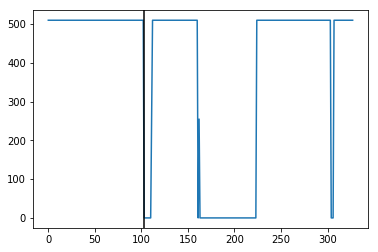

103


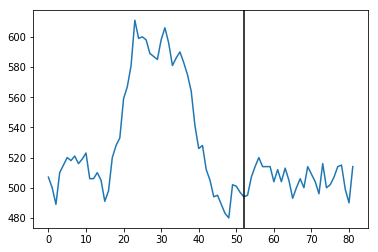

52
[52, 68]
[103, 81]
tube length [px]: 52.6307894678


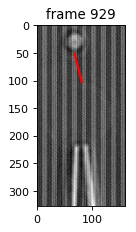

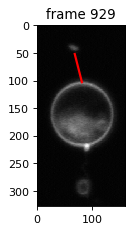

############### 930
77


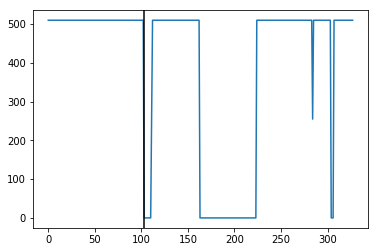

103


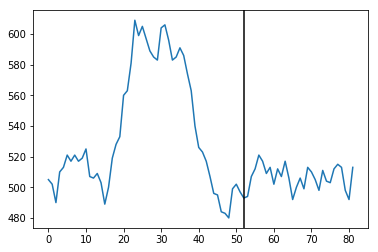

52
[52, 68]
[103, 81]
tube length [px]: 52.6307894678


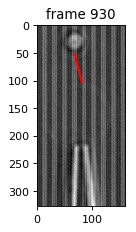

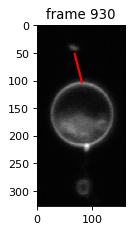

############### 931
73


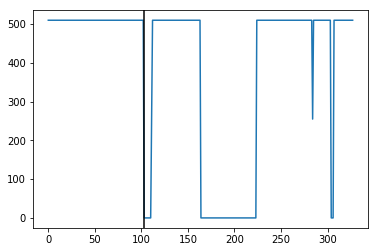

103


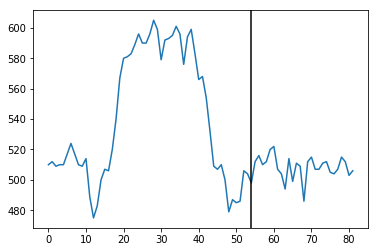

54
[54, -1]
[103, 81]
tube length [px]: 95.5248658727


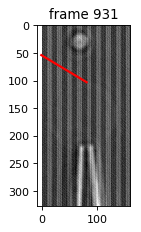

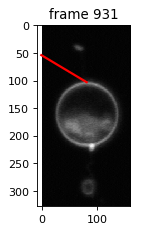

############### 932
73


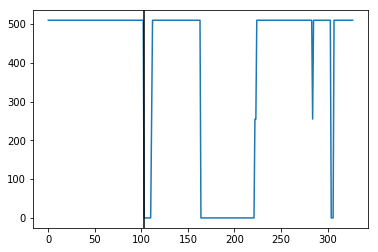

103


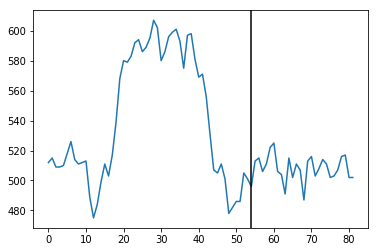

54
[54, -1]
[103, 81]
tube length [px]: 95.5248658727


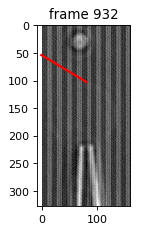

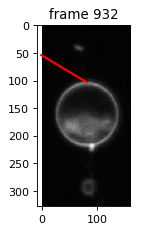

############### 933
73


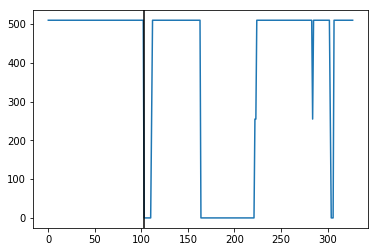

103


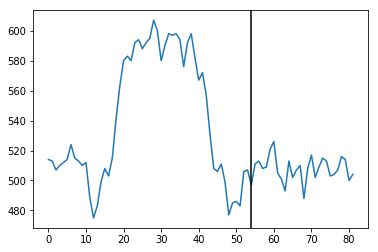

54
[54, -1]
[103, 80]
tube length [px]: 94.6678403683


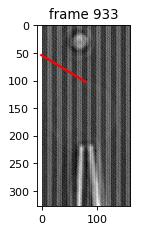

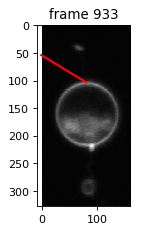

############### 934
77


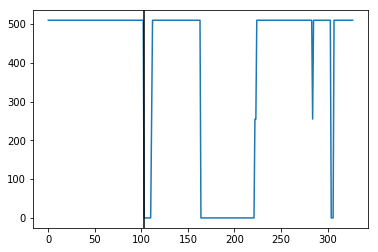

103


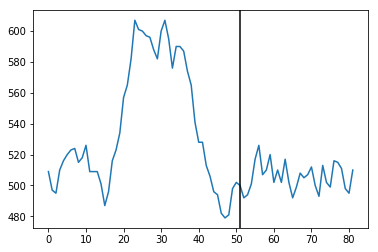

51
[51, 67]
[103, 80]
tube length [px]: 53.600373133


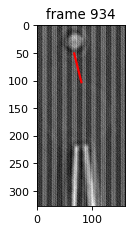

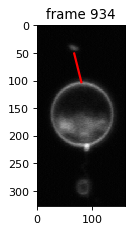

############### 935
78


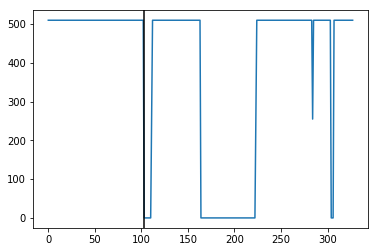

103


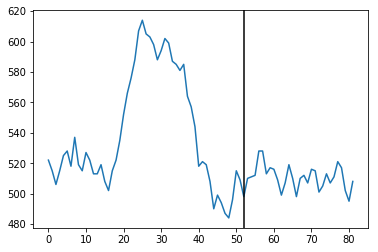

52
[52, 65]
[103, 80]
tube length [px]: 53.16013544


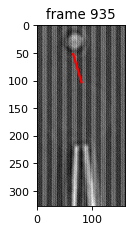

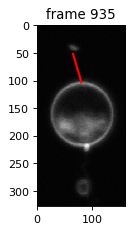

############### 936
78


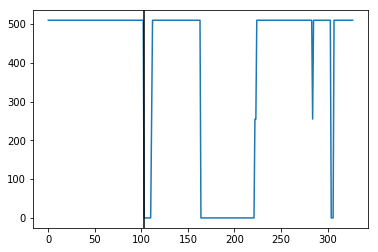

103


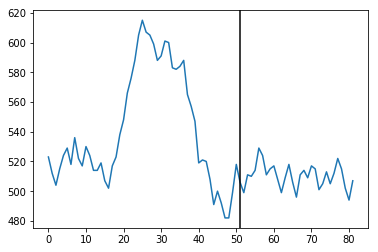

51
[51, 67]
[103, 80]
tube length [px]: 53.600373133


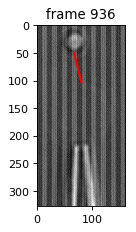

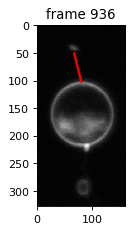

############### 937
76


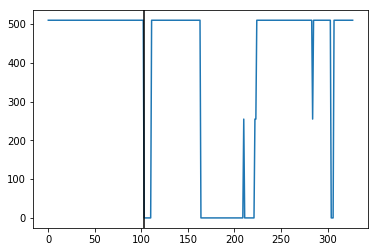

103


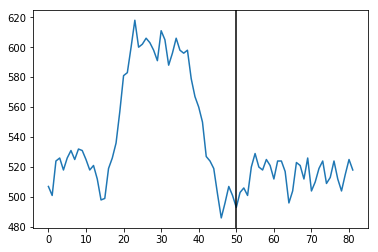

50
[50, 69]
[103, 81]
tube length [px]: 54.3415126768


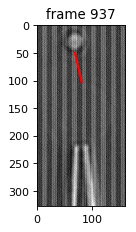

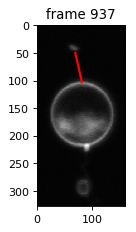

############### 938
76


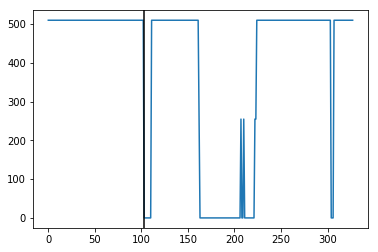

103


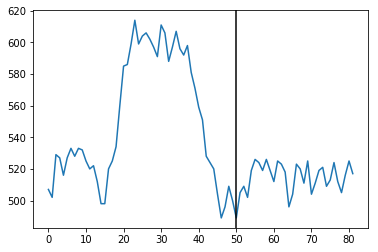

50
[50, 69]
[103, 81]
tube length [px]: 54.3415126768


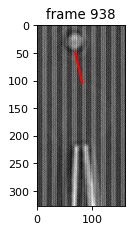

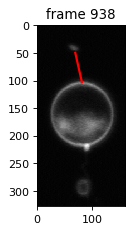

############### 939
76


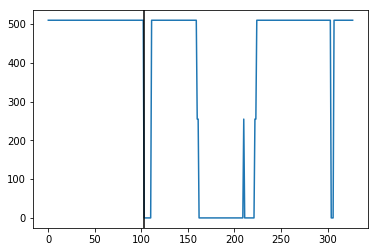

103


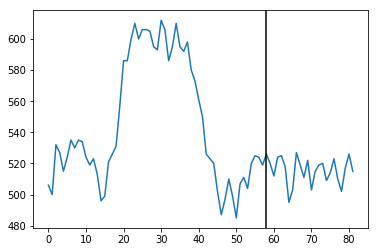

58
[58, -1]
[103, 80]
tube length [px]: 92.6606712689


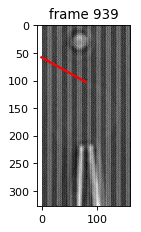

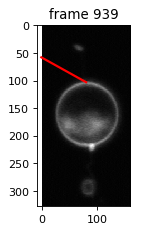

############### 940
76


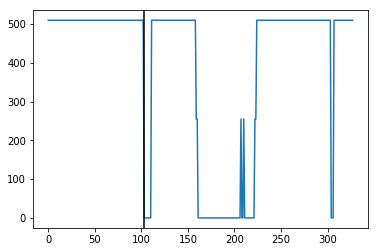

103


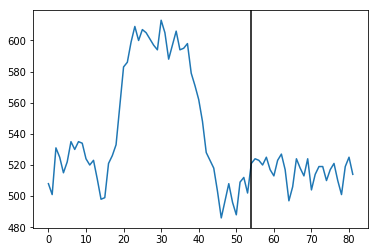

54
[54, -1]
[103, 80]
tube length [px]: 94.6678403683


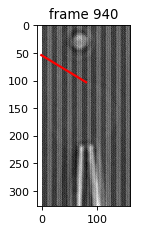

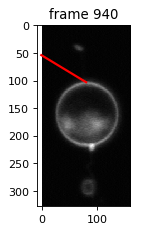

############### 941
76


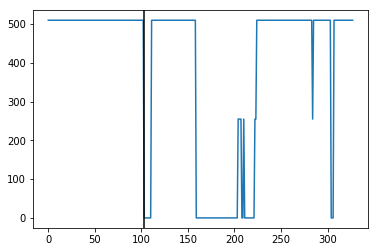

103


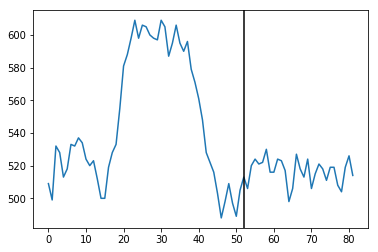

52
[52, 66]
[103, 80]
tube length [px]: 52.8866712887


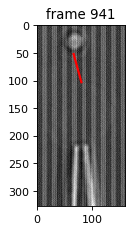

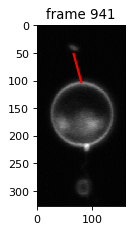

############### 942
72


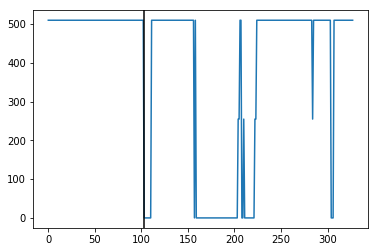

103


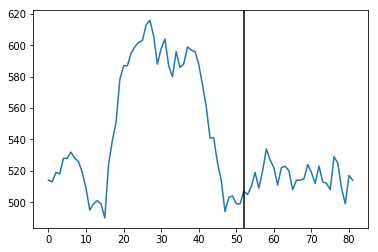

52
[52, 58]
[103, 80]
tube length [px]: 55.542776308


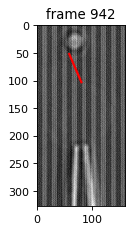

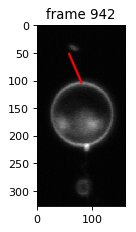

############### 943
74


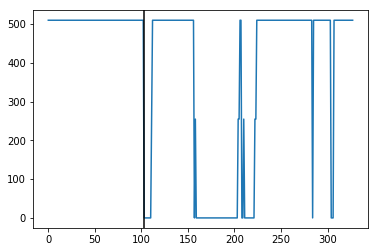

103


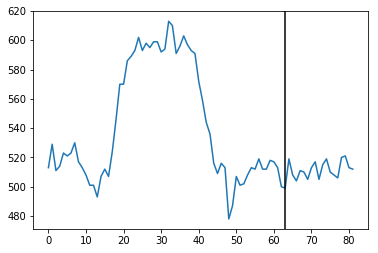

63
[63, -1]
[103, 80]
tube length [px]: 90.3382532486


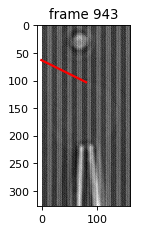

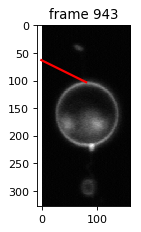

############### 944
74


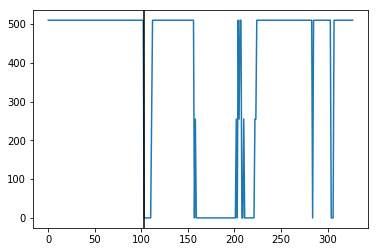

103


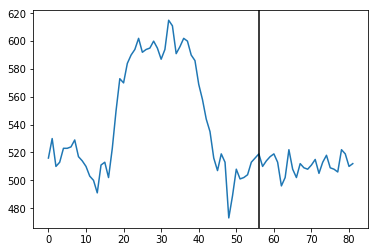

56
[56, 22]
[103, 80]
tube length [px]: 74.6525284234


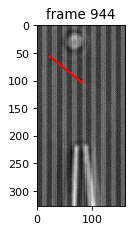

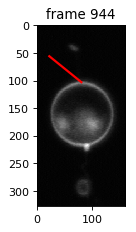

############### 945
70


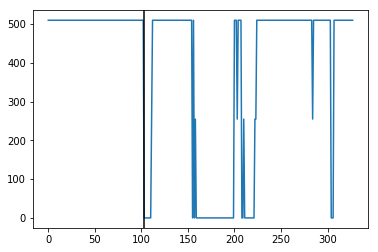

103


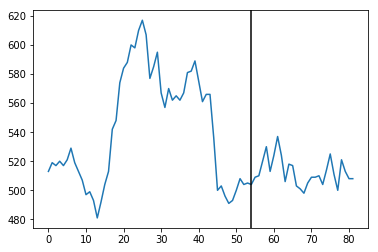

54
[54, -1]
[103, 80]
tube length [px]: 94.6678403683


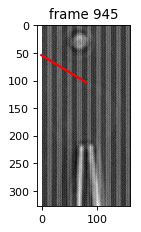

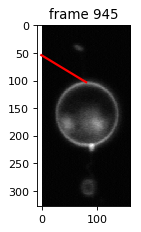

############### 946
74


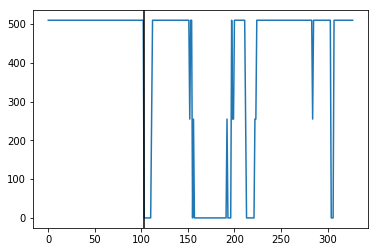

103


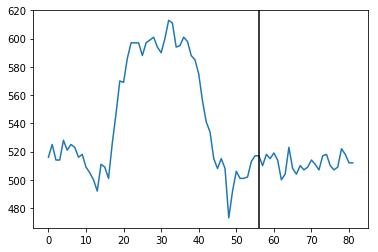

56
[56, 90]
[103, 80]
tube length [px]: 48.0520551069


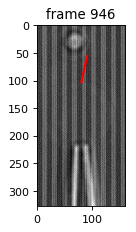

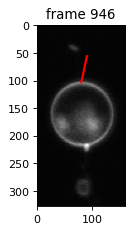

############### 947
74


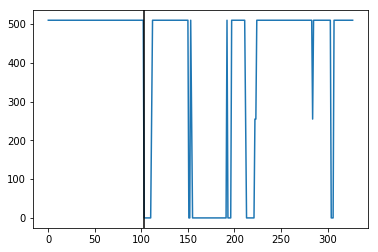

103


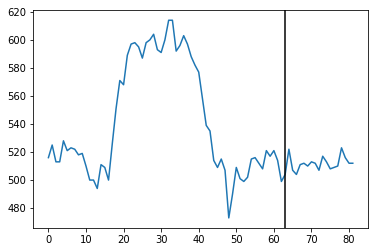

63
[63, -1]
[103, 80]
tube length [px]: 90.3382532486


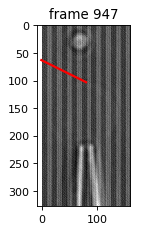

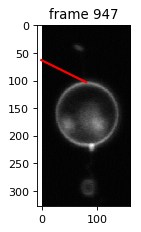

############### 948
72


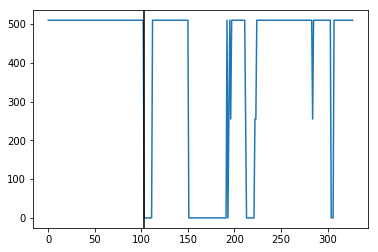

103


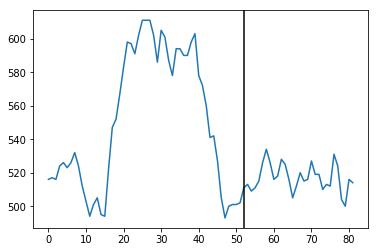

52
[52, 68]
[103, 80]
tube length [px]: 52.3927475897


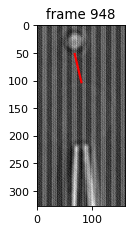

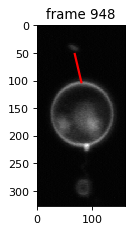

############### 949
72


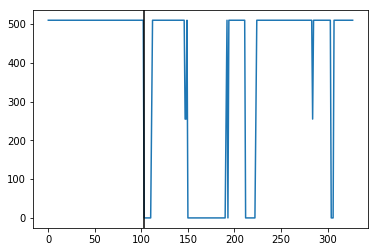

103


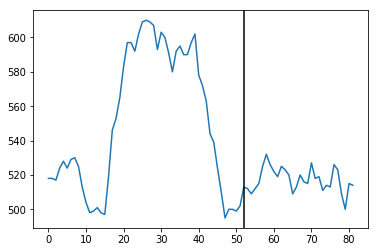

52
[52, -1]
[103, 80]
tube length [px]: 95.7183368013


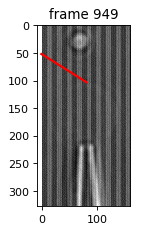

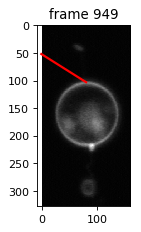

In [34]:
tubeWindow_y = 15 #lenght in px up and down from the midpoint where the tube is ok


analysisResult = []
#for i in range(0,len(frames)):
for i in range(900,950):

    try:
        print("############### "+str(i))
        tubeEnvelope = getTubeEnvelope(frames[i])
        tubeMidpoint_x = get_tube_midpoint_x(tubeEnvelope,tubeMidPoint_y,tubeWindow_y)
        print(tubeMidpoint_x)
        tubeAttachmentPoint_vesicle_y = compute_tube_attachment_point_on_vesicle_y(framest[i], tubeMidPoint_y,tubeWindow_y)
        print(tubeAttachmentPoint_vesicle_y)
        tubeAttachmentPoint_bead_y = compute_tube_attachment_point_on_bead_y(framesg[i],tubeMidPoint_y, tubeMidpoint_x)
        print(tubeAttachmentPoint_bead_y)
        
        beadAttachmentVector = [tubeAttachmentPoint_bead_y,get_tube_x(tubeEnvelope,tubeAttachmentPoint_bead_y)]
        print(beadAttachmentVector)
        vesicleAttachmentVector = [tubeAttachmentPoint_vesicle_y,get_tube_x(tubeEnvelope,tubeAttachmentPoint_vesicle_y)]
        print(vesicleAttachmentVector)
        
        tubeLenght = get_tube_lenght(beadAttachmentVector,vesicleAttachmentVector)
        print("tube length [px]:",tubeLenght)
        
        fig = plt.figure(figsize=(3, 3), dpi=80)
        plt.imshow(framesg[i],cmap='gray')
        #plot([x1, x2], [y1, y2], color='k', linestyle='-', linewidth=2)
        plt.plot([beadAttachmentVector[1], vesicleAttachmentVector[1]],
                 [beadAttachmentVector[0], vesicleAttachmentVector[0]], 'r-', lw=2)
        plt.title("frame "+str(i))
        plt.show()

        fig.savefig("./output/tube__calculate_tube_vector/frame_"+str(i)+"_membrane.png")
        
        fig = plt.figure(figsize=(3, 3), dpi=80)
        plt.imshow(frames[i],cmap='gray')
        #plot([x1, x2], [y1, y2], color='k', linestyle='-', linewidth=2)
        plt.plot([beadAttachmentVector[1], vesicleAttachmentVector[1]],
                 [beadAttachmentVector[0], vesicleAttachmentVector[0]], 'r-', lw=2)
        plt.title("frame "+str(i))
        plt.show()
        fig.savefig("./output/tube__calculate_tube_vector/frame_"+str(i)+"_TD.png")
        
        analysisResult.append([tubeLenght,vesicleAttachmentVector[0],vesicleAttachmentVector[1],beadAttachmentVector[0],beadAttachmentVector[1]])
    except ValueError:
        print("Oops!  That was no valid number.  Try again...")
        analysisResult.append(np.zeros(5))
    

In [2]:
import pandas as pd
df = pd.DataFrame(data=analysisResult)
df.to_csv("./output/tube_vector_pandas.csv",
          header=['tubeLenght',"vesicleAttachmentVector[0]",'vesicleAttachmentVector[1]','beadAttachmentVector[0]','beadAttachmentVector[1]'])


NameError: name 'analysisResult' is not defined

In [26]:
import csv

with open("./output/tube_vector.csv", "w") as f:
    writer = csv.writer(f)
    writer.writerows(analysisResult)

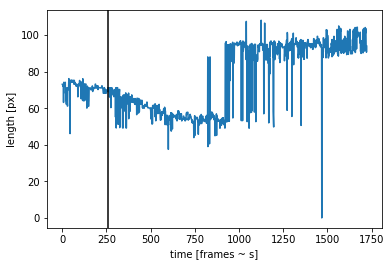

In [33]:
analysisResult_fromFile = []
with open("./output/tube_vector.csv", "r") as f:
    reader = csv.reader(f)
    for line in reader:
        analysisResult_fromFile.append(line)

#print(analysisResult_fromFile)
plt.plot(np.array(analysisResult_fromFile).astype(float)[:,0])
plt.xlabel("time [frames ~ s]")
plt.ylabel("length [px]")
plt.axvline(x=258,c='k')

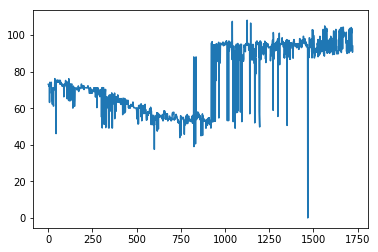

In [32]:
plt.plot(np.array(analysisResult_fromFile).astype(float)[:,0])